# Redes neuronales

Vamos a crear un modelo de clasificación de cancer de seno.

In [16]:
import numpy as np
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.metrics import make_scorer # permite crear una clase scorer a partir de una función de score (necesario para el kappa)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Entendimiento de los datos

In [17]:
cancer = load_breast_cancer()

In [18]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Tenemos un baseline que clasifica en maligno, con 357 instancias benignas vs 212 malignas (62.7%)

In [19]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
data = pd.DataFrame(cancer.data)
data.columns = cancer.feature_names

In [22]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [23]:
X = cancer['data']
y = cancer['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
X_train.shape

(426, 30)

## Pretratamiento


Normalizar **no es necesario ni para las redes neuronales** desde el punto de vista que, como con la **regresión logística**, no cambia las capacidades predictivas del modelo, solo la magnitud de los coeficientes y su posible interpretación (en regresión logística, ya que en redes neuronales no es posible pensar en términos de inferencia).

Sin embargo, normalizar es una buena práctica en el sentido de que puede mejorar el número de épocas de entrenamiento necesarias, y se puede llegar a convertir en una práctica obligatoria en el caso de redes muy profundas, sobre las cuales el **gradiente** del error propagado puede **saturarse** o **desvanecerse**.

Creamos entonces un objeto escalador que aprende a transformar datos solo con respecto a los datos de entrenamiento, ya que en teoría no se conocen los de test en el momento del aprendizaje.
Se aplica luego la transformación a ambos conjuntos (train y test).

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train[0:5]

array([[ 0.56834943, -0.7455382 ,  0.58009089,  0.37053367,  0.16248975,
         0.75051504, -0.29232688,  0.12077331,  0.64546786,  0.42409254,
        -0.8459362 , -1.33183264, -0.76246363, -0.59518062, -0.83573848,
        -0.40831834, -0.39989516,  0.02644473, -0.13791584, -0.04101054,
         0.13524938, -1.06324969,  0.15967859, -0.0411782 , -0.41416553,
        -0.0124391 , -0.31116881,  0.14461744,  0.39847515,  0.28446451],
       [-0.28961453, -0.14718352, -0.26447524, -0.35755004,  1.3705287 ,
         0.35627046,  0.40744592,  0.62125191,  1.15404923,  0.71471915,
        -0.4349292 , -0.59897155, -0.48949416, -0.37623321, -0.18336028,
        -0.12288072, -0.10165446,  0.05631866, -0.37842054, -0.06070741,
        -0.13701334,  0.34997575, -0.14949267, -0.22447494,  1.96801062,
         0.97681458,  1.02736027,  1.41557963,  1.61872573,  1.78132724],
       [-0.48980612, -0.45906723, -0.49432026, -0.51383425, -0.51401207,
        -0.53506513, -0.67184353, -0.65917995, -1

## Modelamiento

Con una regresión logística nos habría ido así:

In [28]:
np.random.seed(1234)
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

C:\Users\Alejandro Narvaez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965 , Kappa: 0.9248554913294798 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.95      1.00      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



Con una red neuronal multi-capas obtenemos:

In [30]:
np.random.seed(1234)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965 , Kappa: 0.9248554913294798 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.95      1.00      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



<font color = "red">Encuentre la mejor red neuronal utilizando **GridSearchCV**, buscando la mejor combinación de los parámetros siguientes:</font>
* <font color = "red">**activation**: función de activación, a escoger entre 'logistic', 'tanh', 'relu' (valor por defecto)</font>
* <font color = "red">**max_iter**: máximo número de épocas de entrenamiento (por defecto, 200). Puede que no se necesiten todas las especificadas si se llega a convergencia).</font>
* <font color = "red">**hidden_layer_sizes**: topología de la red, vector indicando el número de neuronas por capa. Por defecto solo se tiene un capa escondidad con 100 neuronas: (100).</font>
* <font color = "red">**learning_rate_init**: tasa de aprendizaje inicial (por defecto es constante aunque se puede modificar esta tasa a medida que se va avanzando en el número de épocas). Por defecto, el valor es 0.001. </font>

In [32]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

### activation

In [34]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [35]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}%".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic'}, que permiten obtener un Accuracy de 98.36% y un Kappa del 96.44%
Tiempo total: 0.08 minutos


C:\Users\Alejandro Narvaez\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
df = pd.DataFrame([(activation, acc*100, kappa*100) for (activation, acc, kappa) in 
                   zip(activation_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('activation', 'Accuracy', 'Kappa'))

In [37]:
df

,activation,Accuracy,Kappa
0,logistic,98.356808,96.444002
1,relu,97.652582,94.946135
2,tanh,96.713615,92.966567


In [38]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.958041958041958 , Kappa: 0.9095127610208816 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [39]:
grid.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### max_iter

In [40]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'max_iter':max_iter_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [41]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'max_iter': 50}, que permiten obtener un Accuracy de 98.59% y un Kappa del 96.96
Tiempo total: 0.08 minutos


C:\Users\Alejandro Narvaez\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
df = pd.DataFrame([(max_iter, acc*100, kappa*100) for (max_iter, acc, kappa) in 
                   zip(max_iter_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('max_iter', 'Accuracy', 'Kappa'))

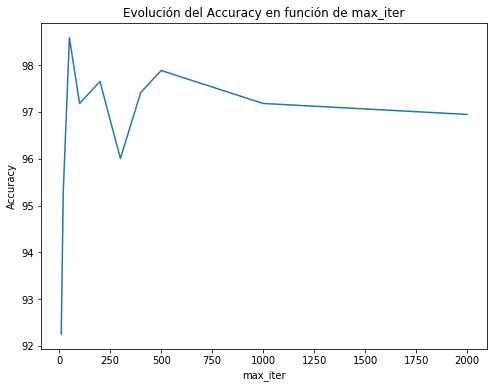

In [43]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.max_iter, df.Accuracy)
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de max_iter')
plt.show()

In [44]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9440559440559441 , Kappa: 0.8793503480278422 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        55
           1       0.93      0.99      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



### hidden_layer_sizes

In [45]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'hidden_layer_sizes':hidden_layer_sizes_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [46]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'hidden_layer_sizes': (20, 10)}, que permiten obtener un Accuracy de 98.36% y un Kappa del 96.46
Tiempo total: 0.06 minutos


C:\Users\Alejandro Narvaez\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
df = pd.DataFrame([(hidden_layer_sizes, acc*100, kappa*100) for (hidden_layer_sizes, acc, kappa) in 
                   zip(hidden_layer_sizes_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('hidden_layer_sizes', 'Accuracy', 'Kappa'))

In [48]:
df

,hidden_layer_sizes,Accuracy,Kappa
0,"(10,)",97.183099,93.979856
1,"(20,)",97.417840,94.425229
2,"(30,)",97.887324,95.424597
3,"(10, 10)",97.417840,94.468541
4,"(20, 20)",97.887324,95.469520
5,"(30, 30)",97.652582,94.966451
6,"(20, 10)",98.356808,96.459800
7,"(30, 20, 10)",97.417840,94.424999


In [49]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.958041958041958 , Kappa: 0.9095127610208816 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### learning_rate_init

In [50]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'learning_rate_init':learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [51]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'learning_rate_init': 0.05}, que permiten obtener un Accuracy de 97.89% y un Kappa del 95.46
Tiempo total: 0.05 minutos


In [52]:
df = pd.DataFrame([(learning_rate_init, acc*100, kappa*100) for (learning_rate_init, acc, kappa) in 
                   zip(learning_rate_init_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('learning_rate_init', 'Accuracy', 'Kappa'))

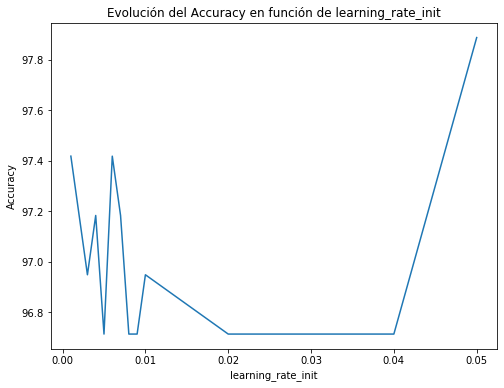

In [53]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.learning_rate_init, df.Accuracy)
plt.xlabel('learning_rate_init')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de learning_rate_init')
plt.show()

In [54]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965 , Kappa: 0.9248554913294798 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.95      1.00      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



### mejor combinación

In [55]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]

In [56]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font>

In [57]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.003, 'max_iter': 50}, que permiten obtener un Accuracy de 99.30% y un Kappa del 98.48
Tiempo total: 18.01 minutos


C:\Users\Alejandro Narvaez\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### <font color="red"><b>HASTA ACÁ (+20 minutos)</b></font>

In [58]:
df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))

In [59]:
df.iloc[np.argsort(-df.Accuracy),]

,Accuracy,Kappa
3576,99.295775,98.475082
2807,99.295775,98.483849
1629,99.061033,97.978273
1367,99.061033,97.992466
2013,98.826291,97.454530
2993,98.826291,97.466176
3392,98.826291,97.468195
1368,98.826291,97.481974
3125,98.826291,97.461675
873,98.826291,97.457197


In [60]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_kappa', 'split1_test_kappa', 'split2_test_kappa', 'split3_test_kappa', 'split4_test_kappa', 'mean_test_kappa', 'std_test_kappa', 'rank_test_kappa', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [61]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.951048951048951 , Kappa: 0.8947976878612717 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        55
           1       0.94      0.99      0.96        88

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [62]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'Accuracy', 'Kappa'))

In [63]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,Accuracy,Kappa
3576,tanh,"(10, 10, 10)",0.007,20,99.295775,98.475082
2807,tanh,"(20,)",0.003,50,99.295775,98.483849
1629,relu,"(30,)",0.006,20,99.061033,97.978273
1367,relu,"(10,)",0.004,75,99.061033,97.992466
2013,relu,"(30, 30)",0.008,10,98.826291,97.454530
2993,tanh,"(30,)",0.009,20,98.826291,97.466176
3392,tanh,"(20, 10)",0.001,100,98.826291,97.468195
1368,relu,"(10,)",0.004,100,98.826291,97.481974
3125,tanh,"(10, 10)",0.010,20,98.826291,97.461675
873,logistic,"(10, 10, 10)",0.003,100,98.826291,97.457197
